In [7]:
import pip
pip.main(['install','ipython'])

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [1]:
import pip
pip.main(['install','basemap-1.1.0-cp36-cp36m-win_amd64.whl'])

Processing c:\users\harshal\project\basemap-1.1.0-cp36-cp36m-win_amd64.whl
  Running setup.py bdist_wheel for pyshp: started
  Running setup.py bdist_wheel for pyshp: finished with status 'done'
  Stored in directory: C:\Users\HARSHAL\AppData\Local\pip\Cache\wheels\cc\e8\7c\f00fc95ae2a16ed41be9defdd647213a334fd12e03b1452c26
Successfully built pyshp


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [8]:
import pip
pip.main(['install','plotly'])

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [5]:
import pip
pip.main(['install','xgboost'])

  Using cached https://files.pythonhosted.org/packages/1d/e7/5258cb787dc036f419ec57491decf8bfa89ab52c401b08b4b9228e43dc4c/xgboost-0.81-py2.py3-none-win_amd64.whl


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

# Importing the Libraries

In [11]:
import datetime, warnings, scipy 
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
import plotly
from plotly.graph_objs import Scatter, Layout
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Overview of the Dataset

In [12]:
df = pd.read_csv('flights.csv',low_memory = False)

In [13]:
df1 = df[df['MONTH'] == 1]

In [14]:
airports = pd.read_csv('airports.csv')

In [15]:
airlines_names = pd.read_csv('airlines.csv')

In [16]:
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [3]:
print('Dataframe dimensions : ' + str(df.shape))

Dataframe dimensions : (5819079, 31)


In [4]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
tab_info

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,14721,0,0,0,86153,86153,89047,89047,6,105071,105071,0,92513,92513,0,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640
null values (%),0,0,0,0,0,0,0.252978,0,0,0,1.48053,1.48053,1.53026,1.53026,0.000103109,1.80563,1.80563,0,1.58982,1.58982,0,1.58982,1.80563,0,0,98.4554,81.725,81.725,81.725,81.725,81.725


 - It can be observed that the column 'CANCELLATION_REASON' has the maximum amount of null values i.e. 98.45% 

In [11]:
df.isnull().sum(axis=0)

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

# Data Cleaning

## Date & Time

In [5]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])

In [6]:
# Function that convert the 'HHMM' string to datetime.time
def format(time):
    if pd.isnull(time):
        return np.nan
    else:
        if time == 2400: time = 0
        time = "{0:04d}".format(int(time))
        t = datetime.time(int(time[0:2]), int(time[2:4]))
        return t

# Function that combines a date and time to produce a datetime.datetime
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    list = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            list.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list.append(combine_date_time(cols))
        else:
            cols[1] = format(cols[1])
            list.append(combine_date_time(cols))
    return pd.Series(list)

In [7]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')

In [8]:
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format)

In [9]:
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format)

In [10]:
df.loc[:5,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0
1,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0
2,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0
3,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0
4,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0
5,2015-01-01 00:25:00,00:20:00,-5.0,06:02:00,06:10:00,8.0


## Filling Factor

In [11]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'DATE',
                       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DIVERTED',
                       'CANCELLED', 'CANCELLATION_REASON', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


In [12]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)
missing_df

,variable,missing values,filling factor (%)
0,AIRLINE,0,100.000000
1,ORIGIN_AIRPORT,0,100.000000
2,DESTINATION_AIRPORT,0,100.000000
3,SCHEDULED_DEPARTURE,0,100.000000
4,DEPARTURE_TIME,86153,98.519474
5,DEPARTURE_DELAY,86153,98.519474
6,SCHEDULED_ARRIVAL,0,100.000000
7,ARRIVAL_TIME,92513,98.410178
8,ARRIVAL_DELAY,105071,98.194371
9,SCHEDULED_TIME,6,99.999897


 - The variable's filling factor is quite good (> 98%)

In [13]:
df.dropna(inplace = True)

# Data Visualization

## Determining the Airport with Maximum Air Traffic

In [17]:
o = np.array(df1['ORIGIN_AIRPORT'])
d = np.array(df1['DESTINATION_AIRPORT'])

In [18]:
o_unique_airports, o_no_flights = np.unique(o, return_counts=True)
d_unique_airports, d_no_flights = np.unique(d, return_counts=True)

In [19]:
plotly.offline.plot({
    "data": [Scatter(x=o_unique_airports, y=o_no_flights)],
    "layout": Layout(title="Number of flights departing from Origin Airport in Jan 2015",
        xaxis=dict(title='Name of Airports',titlefont=dict(family='Courier New, monospace',size=18)),
        yaxis=dict(title='No of Flights',titlefont=dict(family='Courier New, monospace',size=18)))
})

'file://C:\\Users\\HARSHAL\\Project\\temp-plot.html'

<img src="plot 1.jpg">

 - It can be observed that the airport of 'Atlanta' city had the highest number of departing flights(29,512) in January 2015.

In [20]:
plotly.offline.plot({
    "data": [Scatter(x=d_unique_airports, y=d_no_flights)],
    "layout": Layout(title="Number of flights arriving at Destination Airport in Jan 2015",
        xaxis=dict(title='Name of Airports',titlefont=dict(family='Courier New, monospace',size=18)),
        yaxis=dict(title='No of Flights',titlefont=dict(family='Courier New, monospace',size=18)))
})

'file://C:\\Users\\HARSHAL\\Project\\temp-plot.html'

<img src="plot 2.jpg">

 - From the above graph, it can be deduced that the 'Atlanta City Airport' contains the highest no of incoming flights(29,492).

### 'Atlanta City Airport' can be considered as the busiest airport with maximum air traffic as of January 2015.

In [5]:
count_flights = df1['ORIGIN_AIRPORT'].value_counts()
#___________________________
plt.figure(figsize=(11,11))
#________________________________________
# define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1]))

In [6]:
map = Basemap(resolution='i',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)

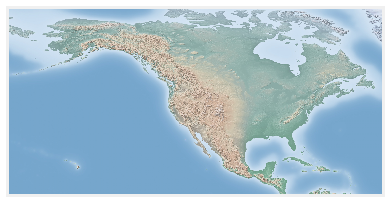

In [12]:
map.shadedrelief()

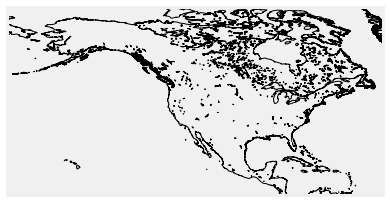

In [13]:
map.drawcoastlines()

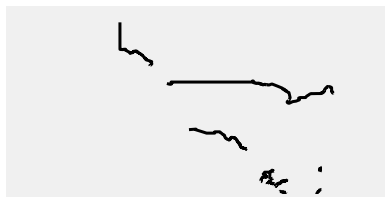

In [14]:
map.drawcountries(linewidth = 3)

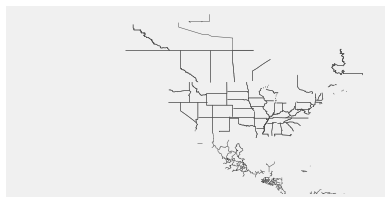

In [15]:
map.drawstates(color='0.3')

In [33]:
for index, (code, y,x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]

KeyError: 'ACK'

In [37]:
count_flights.iloc[:,1]

IndexingError: Too many indexers

In [7]:
temp = pd.read_csv('airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()
latitude_airport = temp.set_index('IATA_CODE')['LATITUDE'].to_dict()
longitude_airport = temp.set_index('IATA_CODE')['LONGITUDE'].to_dict()

In [8]:
def make_map(df, carrier, long_min, long_max, lat_min, lat_max):
    fig=plt.figure(figsize=(7,3))
    ax=fig.add_axes([0.,0.,1.,1.])
    m = Basemap(resolution='i',llcrnrlon=long_min, urcrnrlon=long_max,
                  llcrnrlat=lat_min, urcrnrlat=lat_max, lat_0=0, lon_0=0,)
    df2 = df[df['AIRLINE'] == carrier]
    count_trajectories = df2.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size()
    count_trajectories.sort_values(inplace = True)
    
    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        m.plot(nylon, nylat, marker='o', markersize = 10, markeredgewidth = 1,
                   color = 'seagreen', markeredgecolor='k')

    for (origin, dest), s in count_trajectories.iteritems():
        nylat,   nylon = latitude_airport[origin], longitude_airport[origin]
        lonlat, lonlon = latitude_airport[dest], longitude_airport[dest]
        if pd.isnull(nylat) or pd.isnull(nylon) or \
                pd.isnull(lonlat) or pd.isnull(lonlon): continue
        if s < 100:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=0.5, color='b',
                             label = '< 100')
        elif s < 200:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='r',
                             label = '100 <.< 200')
        else:
            m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='gold',
                              label = '> 200')    
    #_____________________________________________
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    key_order = ('< 100', '100 <.< 200', '> 200')                
    new_label = OrderedDict()
    for key in key_order:
        if key not in by_label.keys(): continue
        new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 'best', prop= {'size':8},
               title='flights per month', facecolor = 'palegreen', 
               shadow = True, frameon = True, framealpha = 1)    
    m.drawcoastlines()
    m.fillcontinents()
    ax.set_title('{} flights'.format(abbr_companies[carrier]))

KeyError: '14107'

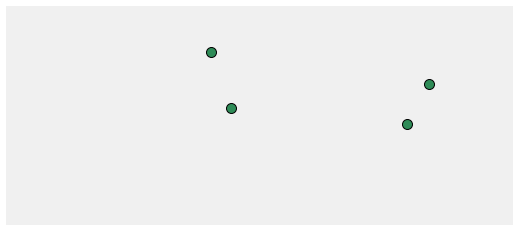

In [10]:
coord = dict()
coord['AA'] = [-165, -60, 10, 55]
coord['AS'] = [-182, -63, 10, 75]
coord['HA'] = [-180, -65, 10, 52]
for carrier in ['AA','AS','HA']: 
    make_map(df, carrier, *coord[carrier])

## Basic statistical description of airlines

In [15]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [16]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [17]:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
AIRLINE,,,,
VX,61248.0,644.0,8.993486,-24.0
HA,76041.0,1433.0,0.469918,-27.0
F9,90090.0,1112.0,13.303352,-46.0
NK,115193.0,836.0,15.883101,-37.0
AS,171439.0,963.0,1.718926,-82.0
US,194223.0,759.0,6.081000,-28.0
B6,262042.0,1006.0,11.442467,-31.0
MQ,278791.0,1544.0,9.967187,-36.0
UA,507762.0,1314.0,14.333056,-40.0


 - Based on the above statistical description, the passengers should avoid boarding the flights of Airline Company 'Spirit Airlines(NK)' as its mean departure delay is maximum among all airlines. 
 - 'Hawaiian Airlines(HA)' proves to be the most promising airline which incurs minimum delay in its departing flights. 

## Comparison of Airline Companies

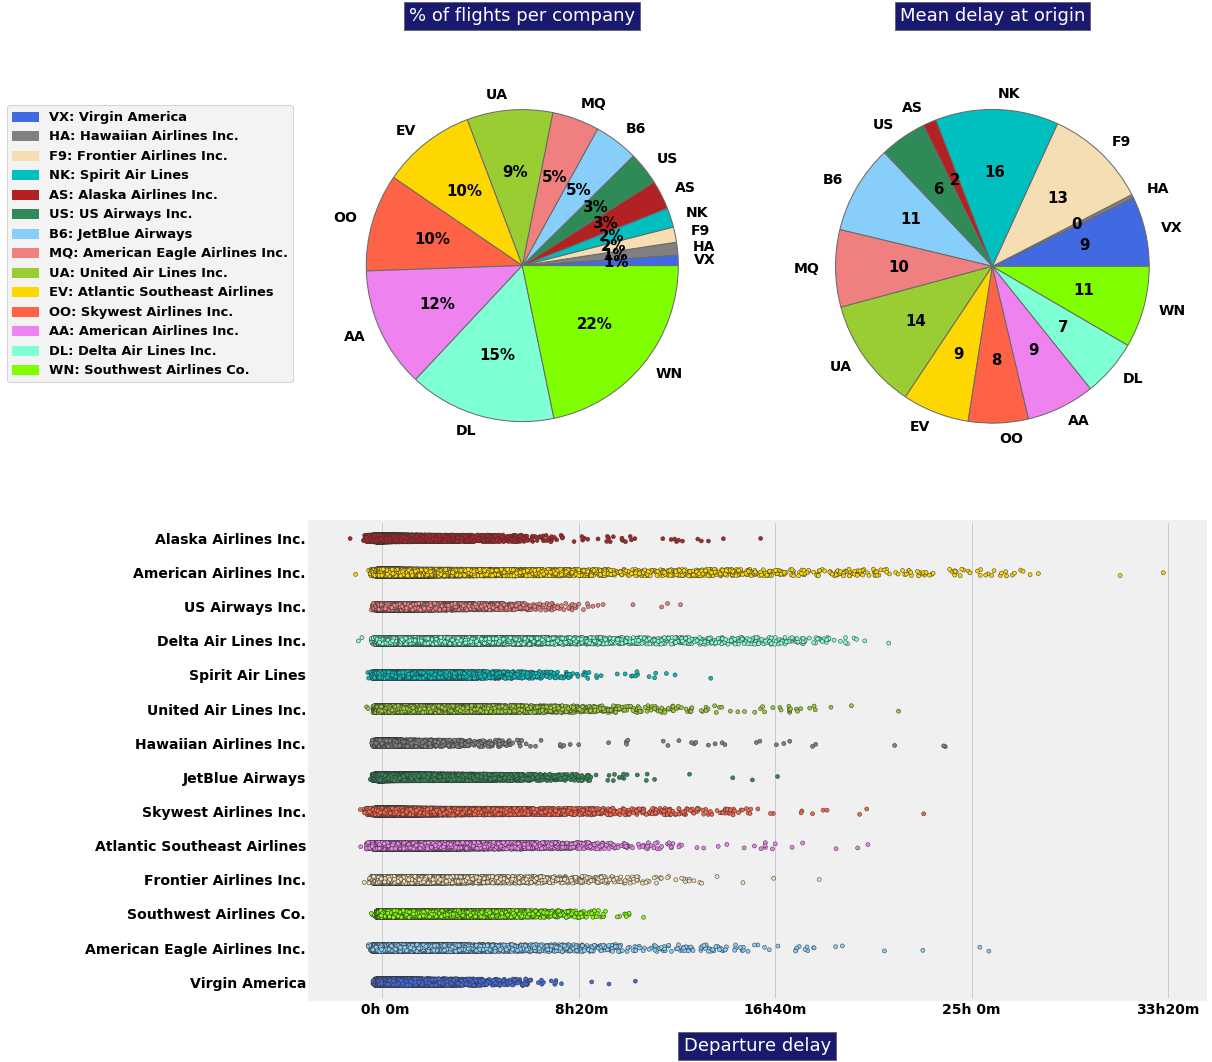

In [18]:
font = {'family' : 'normal', 'weight' : 'bold', 'size' : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches

df2 = df.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:])
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)

# Pie chart : mean delay at departure

sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

# striplot with all the values reported for the delays

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)

 - The Pie Chart suggests that the passengers must board the flights of 'Hawaiian Airlines(HA)' as it has 0 % departure delay. But the problem with this airline is that it has very less amount of flights(1 % of total flights). 
 - For more amount of available flights with lesser delay, 'Delta Airlines(DL)' is the best option. 
 - From the second graph, 'American Airlines(AA)' has a lot of data points outside the 8h20m mark which means that most of its flights have been delayed for more than 8 hours. Hence, the flights of 'American Airlines' should be avoided to save time.

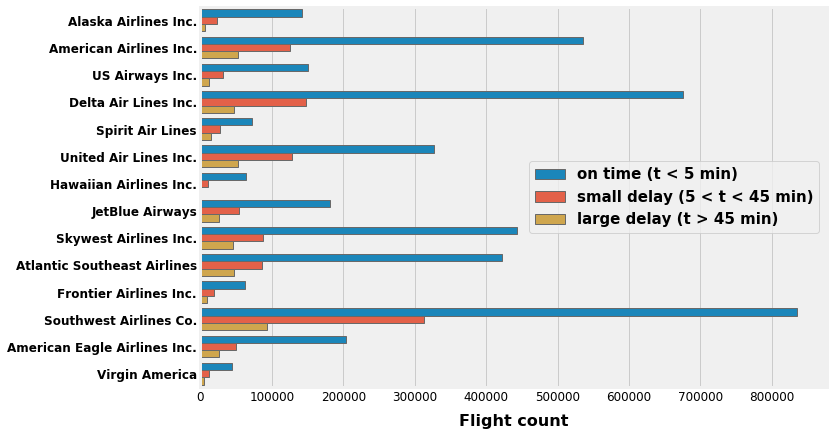

In [22]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

 - This figure gives a count of the delays of less than 5 minutes, those in the range 5 < t < 45 min and finally, the delays greater than 45 minutes.
 - We can observe the fact that a majority of flights take off on time. However, we see that occasionally, we can face really large delays that can reach a few ten hours !
 - Hence, we see that independent of the airline, delays greater than 45 minutes only account for a few percent. However, the proportion of delays in these groups depends on the airline: as an example, in case of 'Atlantic Southeast Airlines', the delays greater than 45 minutes are 50 % of the delays in the range 5 < t < 45 min. Things are better for 'SouthWest Airlines' since delays greater than 45 minutes are 3 times less frequent than delays in the range 5 < t < 45 min.

## Delay Distribution

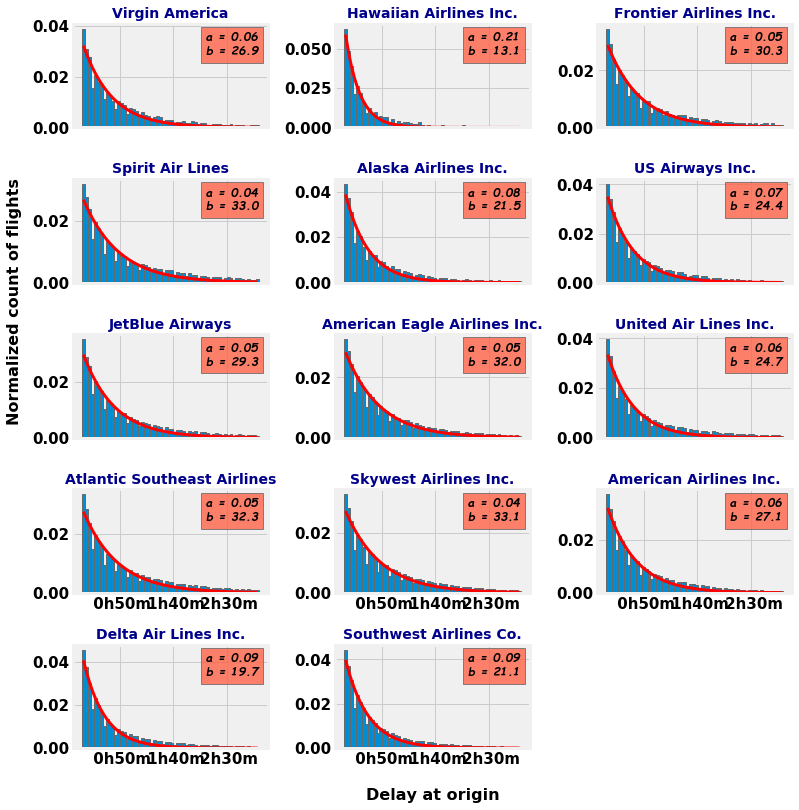

In [23]:
# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)

points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,11))
i = 0
for carrier_name in [abbr_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_name]['DEPARTURE_DELAY'],
                                range = (15,180), normed=True, bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    points.append(popt)
    label_company.append(carrier_name)
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
        
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

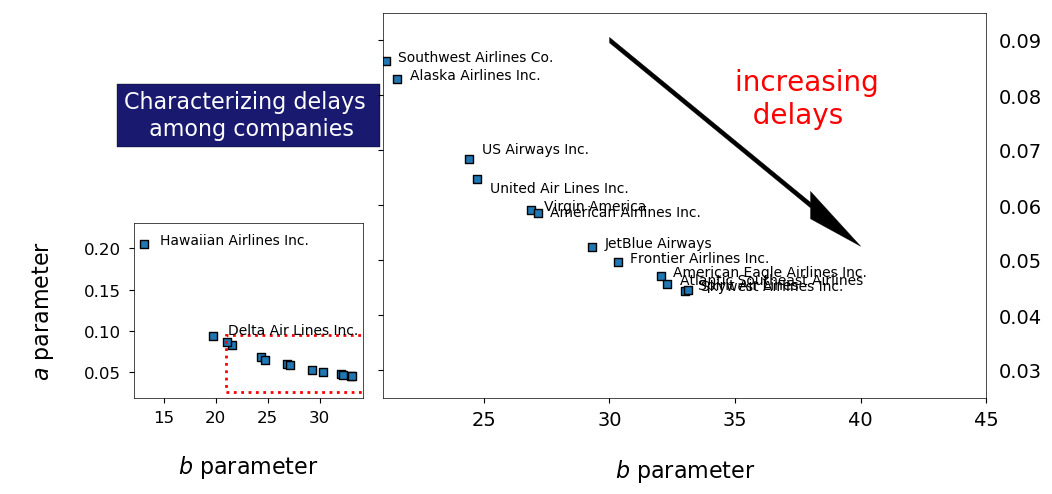

In [24]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_context('paper')
import matplotlib.patches as patches

fig = plt.figure(1, figsize=(11,5))
y_shift = [0 for _ in range(14)]
y_shift[3] = 0.5/1000
y_shift[12] = 2.5/1000
y_shift[11] = -0.5/1000
y_shift[8] = -2.5/1000
y_shift[5] = 1/1000
x_val = [s[1] for s in points]
y_val = [s[0] for s in points]

gs=GridSpec(2,7)
#_______________________________
# 1/ Plot overview (left panel)
ax1=fig.add_subplot(gs[1,0:2]) 
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
#__________________________________
# Company label: Hawaiian airlines
i= 1
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#__________________________________
# Company label: Hawaiian airlines
i= 12
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#____________
# Main Title
ax1.text(.5,1.5,'Characterizing delays \n among companies', fontsize=16,
        bbox={'facecolor':'midnightblue', 'pad':5}, color='w',
        horizontalalignment='center',
        transform=ax1.transAxes)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax1.spines[k].set_visible(True)
    ax1.spines[k].set_linewidth(0.5)
    ax1.spines[k].set_color('k')
#____________________
# Create a Rectangle 
rect = patches.Rectangle((21,0.025), 19, 0.07, linewidth=2,
                         edgecolor='r', linestyle=':', facecolor='none')
ax1.add_patch(rect)
#_______________________________________________
# 2/ Zoom on the bulk of carriers (right panel)
ax2=fig.add_subplot(gs[0:2,2:])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
ax2.set_xlim(21,45)
ax2.set_ylim(0.025,0.095)
#________________
# Company labels
for i in range(len(abbr_companies)):
    ax2.annotate(label_company[i], xy=(x_val[i]+0.5, y_val[i]+y_shift[i]),
                 xycoords='data', fontsize = 10)
#____________________________
# Increasing delay direction
ax2.arrow(30, 0.09, 8, -0.03, head_width=0.005,
          shape = 'full', head_length=2, fc='k', ec='k')
ax2.annotate('increasing \n  delays', fontsize= 20, color = 'r',
          xy=(35, 0.075), xycoords='data')
#________________________________
# position and size of the ticks
plt.tick_params(labelleft=False, labelright=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax2.spines[k].set_visible(True)
    ax2.spines[k].set_linewidth(0.5)
    ax2.spines[k].set_color('k')    
#________________________________
# Connection between the 2 plots
xy2 = (40, 0.09) ; xy1 = (21, 0.095)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
xy2 = (40, 0.025) ; xy1 = (21, 0.025)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
#--------------------------------
plt.show()

 - The left panel of this figure gives an overview of the a and b coefficients of the 14 airlines showing that 'Hawaiian Airlines' and 'Delta Airlines' occupy the first two places.
 - The right panel zooms on 12 other airlines. We can see that 'Southwest Airlines', which represent 22% of the total number of flights is well ranked and occupy the third position. 
 - According to this ranking, 'SkyWest Airlines' is the worst carrier.

## Which airline should you fly to avoid significant delays ?

 - From the above graphical representations, it is clear that the passenger should board the flights of either 'Hawaiian Airlines' or 'Delta Airlines'.

## Impact of Origin Airport on Delays

In [25]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

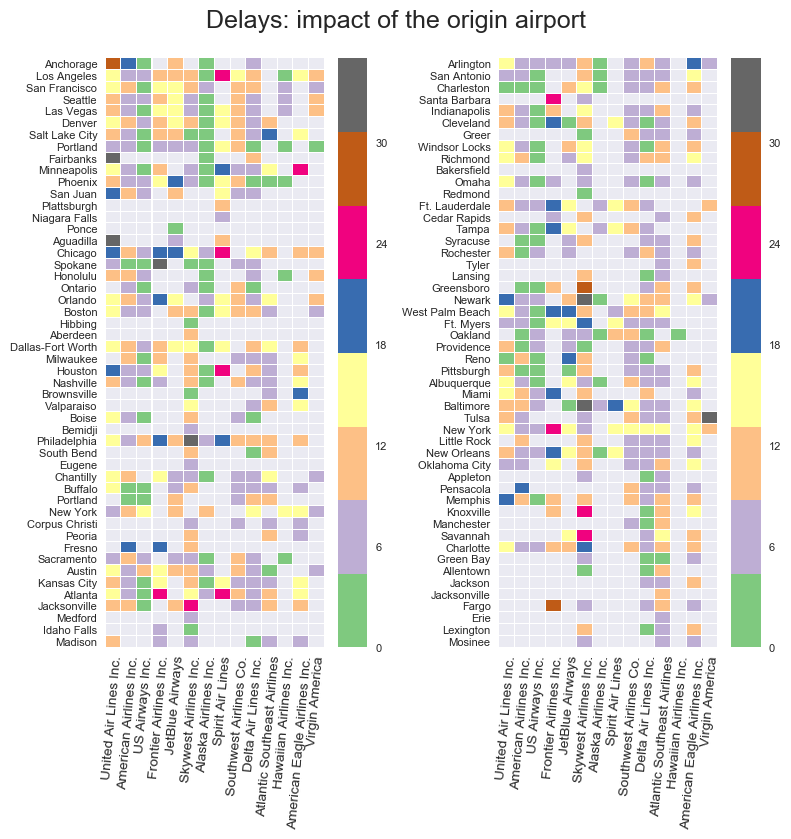

In [27]:
temp = pd.read_csv('airports.csv')
identify_airport = temp.set_index('IATA_CODE')['CITY'].to_dict()

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

 - This figure allows us to draw some conclusions.
 - For example, if we consider the right panel, it will be seen that the column associated with 'Skywest Airlines' mostly reports large delays, while the column associated with 'Delta Airlines' depicts minimum delays.
 - If we now look at the airports of origin, we will see that some airports favour late departures: e.g. Chicago & Philadelphia 
 - Conversely, other airports which are known for on-time departures are Seattle and Charleston.

# Machine Learning

## Feature Engineering

In [14]:
# Creating a sample of flights dataset (25%)
s = df.sample(frac = 0.25)

In [15]:
h = lambda x: str(x)
s['SCHEDULED_DEPARTURE'] = s['SCHEDULED_DEPARTURE'].map(h)
hour = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S" ).hour
s['SCHEDULED_DEPARTURE'] = s['SCHEDULED_DEPARTURE'].map(hour)

h1 = lambda x: str(x)
s['DEPARTURE_TIME'] = s['DEPARTURE_TIME'].map(h1)
hour1 = lambda x: datetime.strptime(x, "%H:%M:%S" ).hour
s['DEPARTURE_TIME'] = s['DEPARTURE_TIME'].map(hour1)

h2 = lambda x: str(x)
s['SCHEDULED_ARRIVAL'] = s['SCHEDULED_ARRIVAL'].map(h2)
hour2 = lambda x: datetime.strptime(x, "%H:%M:%S" ).hour
s['SCHEDULED_ARRIVAL'] = s['SCHEDULED_ARRIVAL'].map(hour2)

h3 = lambda x: str(x)
s['ARRIVAL_TIME'] = s['ARRIVAL_TIME'].map(h3)
hour3 = lambda x: datetime.strptime(x, "%H:%M:%S" ).hour
s['ARRIVAL_TIME'] = s['ARRIVAL_TIME'].map(hour3)

s.head(5)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
1281362,AA,JFK,MIA,14,14,5.0,17,17,-5.0,197.0,187.0
1346431,MQ,JAN,DFW,12,12,-6.0,14,14,-9.0,96.0,93.0
4351253,WN,RDU,BNA,19,19,-4.0,19,19,-13.0,90.0,81.0
3998303,AA,JFK,SJU,20,20,16.0,0,0,17.0,252.0,253.0
4225194,B6,BDL,DCA,19,19,-7.0,20,20,-27.0,88.0,68.0


In [16]:
variables_to_remove = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','ARRIVAL_DELAY']
s.drop(variables_to_remove, axis = 1, inplace = True)
s = s[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME','DEPARTURE_DELAY']]
s.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,DEPARTURE_DELAY
1281362,14,14,17,17,197.0,187.0,5.0
1346431,12,12,14,14,96.0,93.0,-6.0
4351253,19,19,19,19,90.0,81.0,-4.0
3998303,20,20,0,0,252.0,253.0,16.0
4225194,19,19,20,20,88.0,68.0,-7.0


In [17]:
t = s['DEPARTURE_DELAY']
t[t<0] = 0
t[t>0] = 1
s['DEPARTURE_DELAY'] = t
s.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,DEPARTURE_DELAY
1281362,14,14,17,17,197.0,187.0,1.0
1346431,12,12,14,14,96.0,93.0,0.0
4351253,19,19,19,19,90.0,81.0,0.0
3998303,20,20,0,0,252.0,253.0,1.0
4225194,19,19,20,20,88.0,68.0,0.0


## Splitting dataset into Training Data & Test Data

In [18]:
X = s.iloc[:,0:6]
Y = s.iloc[:,6]

In [19]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## XG Boost

In [20]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.51%


## Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred_rfc = rfc.predict(X_test)
rfc_predictions = [round(value) for value in y_pred_rfc]

In [26]:
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
print("Accuracy: %.2f%%" % (rfc_accuracy * 100.0))

Accuracy: 75.46%
